<a href="https://colab.research.google.com/github/Barneybean/Machine_Learning_Model_Selector/blob/master/Selector_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification


## Key Evaluation Terms



*  [Amazon ML Key Classification Metrics](https://docs.aws.amazon.com/machine-learning/latest/dg/binary-model-insights.html?icmpid=docs_machinelearning_console)
*  [sklearn classification metrics
](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)




*   **Precision**:  Measures the fraction of actual positives among those examples that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*  ** Recall**:  Measures the fraction of actual positives that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*   **F1-score**:  Weighted average of recall and precision


* **AUC**:  AUC measures the ability of the model to predict a higher score for positive examples as compared to negative examples

* **False Positive Rat**e:  The false positive rate (FPR) measures the false alarm rate or the fraction of actual negatives that are predicted as positive. The range is 0 to 1. A smaller value indicates better predictive accuracy





## Digits Dataset

### sklearn modeling

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

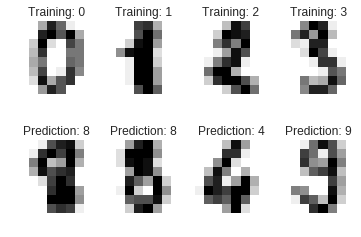

In [2]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
%matplotlib inline

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [3]:
#Cross Validation of above model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

predictions = cross_val_predict(classifier, data[:n_samples // 2], digits.target[:n_samples // 2], cv=6) # run model multiple times 
# plt.scatter(expected, predictions)

accuracy = metrics.r2_score(expected, predicted)
accuracy

0.9260815260588169

### Yellowbrick Confusion Matrix



http://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html


In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


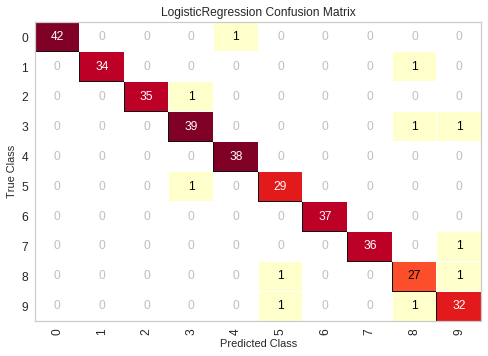

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.8100385697338206

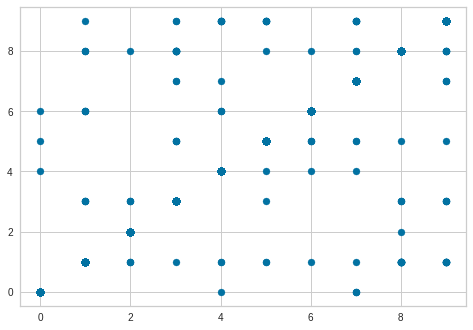

In [5]:

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)

model = LogisticRegression()

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

#Cross Validation of above model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

predictions = cross_val_predict(model, X, y, cv=6) # run model multiple times 
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
accuracy




In [0]:
# model and parameter tunning 
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import metrics, svm
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


digits = load_digits()
X = digits.data
y = digits.target

r2 = []
pred = []

def optimization(models = LogisticRegression(), size = 0.2, r_state=42):
    global best_model 
    global lowest_r2 
    global best_predictions 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state=r_state)

    model = models
    model.fit(X_train, y_train)
    # The ConfusionMatrix visualizer taxes a model
    cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

    # Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
    # cm.fit(X_train, y_train)

    # To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
    # and then creates the confusion_matrix from scikit-learn.
    print("confusion matrix score", cm.score(X_test, y_test))
    # How did we do?
    cm.poof()

    #cross validation
    #Cross Validation of above model
    predictions = cross_val_predict(model, X, y, cv=6) # run model multiple times 
    accuracy = metrics.r2_score(y, predictions)
    accuracy
     
    r2.append(accuracy)
    pred.append(predictions)



confusion matrix score 0.9916666666666667


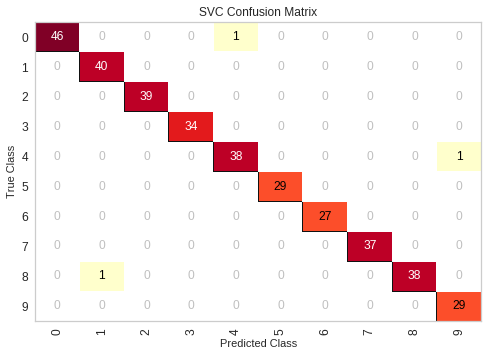

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


confusion matrix score 0.9638888888888889


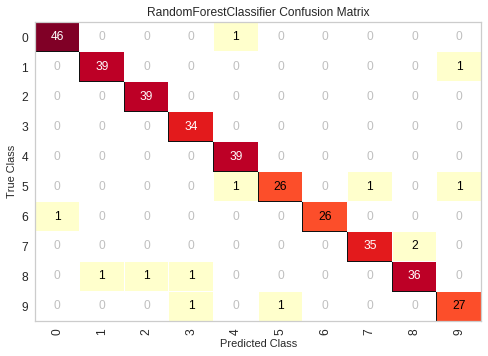

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix score 0.9611111111111111


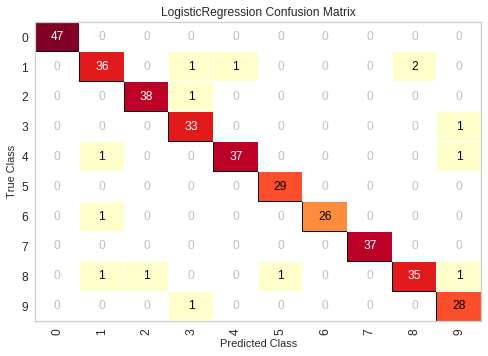

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

confusion matrix score 0.5166666666666667


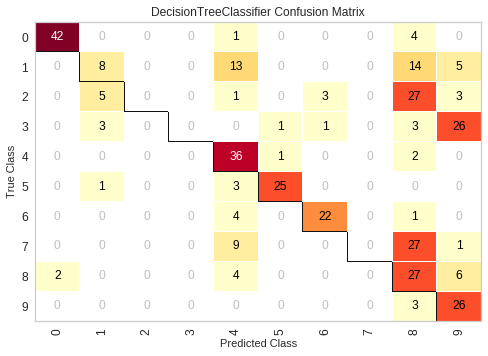

confusion matrix score 0.9888888888888889


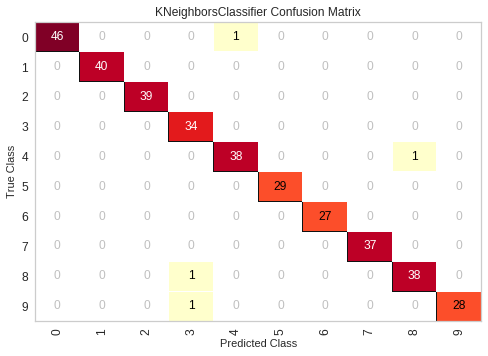

-------
best model is [SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)] with r2 of [0.9461516]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.95      0.99      0.97       182
           2       1.00      0.97      0.99       177
           3       0.99      0.96      0.97       183
           4       0.99      0.97      0.98       181
           5       0.97      0.98      0.98       182
           6       0.99      0.99      0.99       181
           7       0.97      0.98      0.98       179
           8       0.94      0.97      0.95       174
           9       0.97      0.97      0.97       180

   micro avg       0.98      0.98      0.98      1797
   macro avg       0.98      0.98      0.98      1797
weighted avg       0.98  

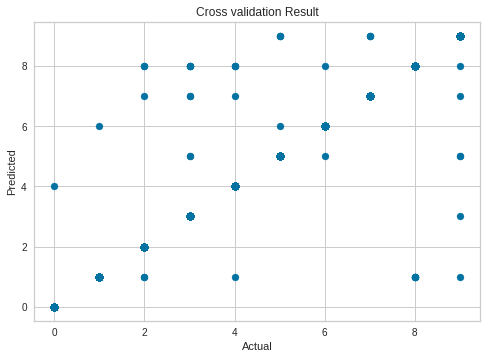

In [24]:

#initalize container
r2 = []
pred = []

models=[svm.SVC(gamma=0.001), 
        RandomForestClassifier(), 
        LogisticRegression(), 
        DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0),
        KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')]

for m in models: 
    optimization(models = m, size=0.2, r_state = 31)

    
result = pd.DataFrame({"model":models, "r2": r2, "predictions": pred})

result

print('-------')

best_row = result[result["r2"] == result["r2"].max()]
best_model = best_row["model"].values
best_r2 = best_row["r2"].values
best_pred = list(best_row["predictions"])[0]

print(f"best model is {best_model} with r2 of {best_r2}")

plt.scatter(y, best_pred)
plt.title("Cross validation Result")
plt.xlabel("Actual")
plt.ylabel("Predicted")

print(classification_report(y, best_pred))



confusion matrix score 0.9888888888888889


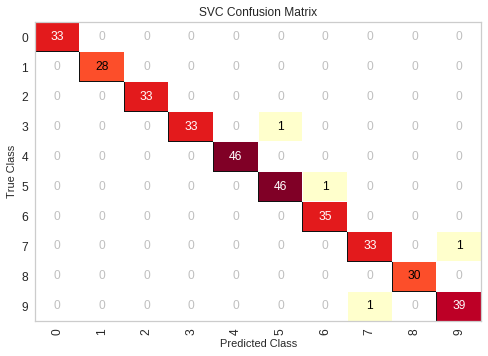

confusion matrix score 0.9527777777777777


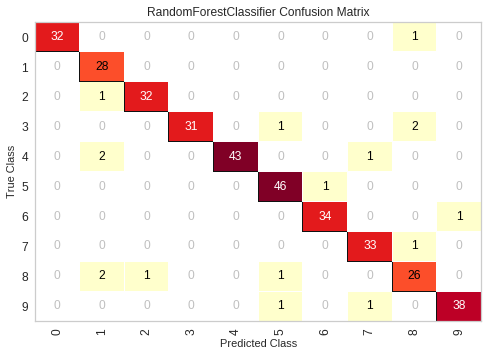

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix score 0.9611111111111111


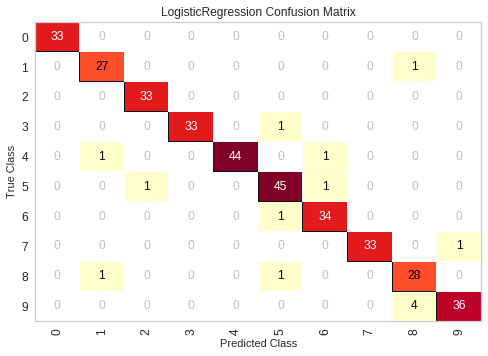

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

confusion matrix score 0.4861111111111111


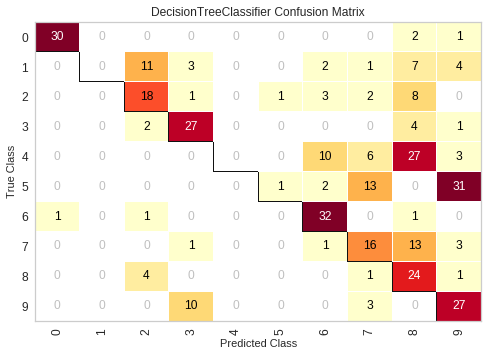

confusion matrix score 0.9861111111111112


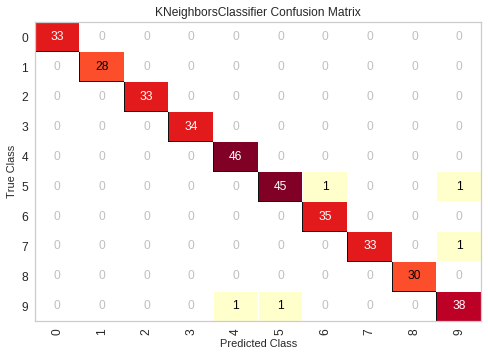

-------
best model is [SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)] with r2 of [0.9461516]


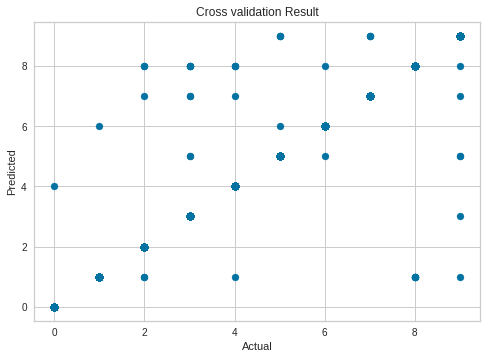

In [23]:
r2 = []
pred = []

for m in models: 
    optimization(models = m, size=0.2, r_state = 42)

    
result = pd.DataFrame({"model":models, "r2": r2, "predictions": pred})

result

print('-------')

best_row = result[result["r2"] == result["r2"].max()]
best_model = best_row["model"].values
best_r2 = best_row["r2"].values
best_pred = list(best_row["predictions"])[0]

print(f"best model is {best_model} with r2 of {best_r2}")
plt.title("Cross validation Result")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.scatter(y, best_pred)


### ROCAUC

http://www.scikit-yb.org/en/latest/api/classifier/rocauc.html


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


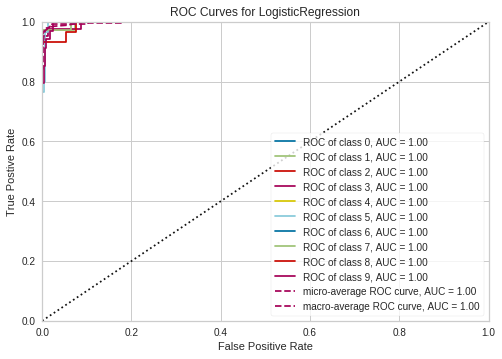

In [25]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classes=[0,1,2,3,4,5,6,7,8,9]

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data